In [168]:
import os
import cv2
import numpy as np
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt

Data Preprocessing

In [169]:
image_directory = 'cell_images/'        #path
SIZE = 100                              #height x width
dataset = []                            #data
label = []                              #class

In [170]:
%%time
parasitized_images = os.listdir(image_directory + 'Parasitized/')
for i, image_name in enumerate( parasitized_images):
    
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'Parasitized/' + image_name)
        image = Image.fromarray(image, "RGB")
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)
        
#Iterate through all images in Parasitized folder, resize to 100 x 100
#Then save into the same numpy array 'dataset' but with label 0

uninfected_images = os.listdir(image_directory + 'Uninfected/')
for i, image_name in enumerate(uninfected_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'Uninfected/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

#Iterate through all images in Uninfected folder, resize to 100 x 100
#Then save into the same numpy array 'dataset' but with label 0

dataset = np.array(dataset)
label = np.array(label)

CPU times: total: 5.41 s
Wall time: 2min 26s


In [171]:
#Data shape
print(dataset.shape)
print(label.shape)

(27558, 100, 100, 3)
(27558,)


Data Visualization

Label: 1


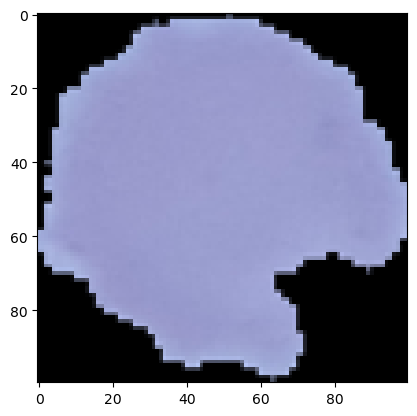

In [172]:
#Display Image
import random

image_number = random.randint(0, len(dataset) - 1)
plt.imshow(np.reshape(dataset[image_number], (100, 100, 3)))
print(f"Label: {label[image_number]}")

In [173]:
#Converting the 4d data to 2d in order to scale for standardize
num_samples, row_orig, col_orig, channels = dataset.shape
dataset = dataset.reshape((num_samples, row_orig * col_orig * channels))
label = label.reshape((num_samples, -1))

In [174]:
#splitting the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset,label,train_size=0.90,test_size=0.10,shuffle=True,random_state=42)
print("X_train : {}".format(X_train.shape))
print("y_train : {}".format(y_train.shape))
print("X_test : {}".format(X_test.shape))
print("y_test : {}".format(y_test.shape))

X_train : (24802, 30000)
y_train : (24802, 1)
X_test : (2756, 30000)
y_test : (2756, 1)


In [175]:
#Data Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Random Forest 

In [176]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

C:\Users\sumed\AppData\Local\Temp\ipykernel_22208\561435597.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestClassifier()

In [177]:
rf_pred = rf.predict(X_test)
rf_pred

array([0, 1, 1, ..., 0, 0, 1])

In [178]:
#Randomforest accuracy
print(f'Train Accuracy:- {rf.score(X_train,y_train):.3f}')
print(f'Test Accuracy:- {rf.score(X_test,y_test):.3f}')

Train Accuracy:- 1.000
Test Accuracy:- 0.828


[Text(0.5, 1.0, 'Confusion Matrix (Random Forest)'),
 Text(0.5, 23.52222222222222, 'Actual'),
 Text(50.722222222222214, 0.5, 'Predicted')]

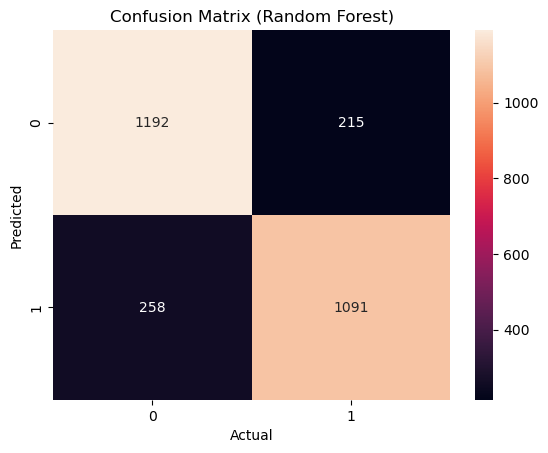

In [179]:
#Confusion Matrix Random Forest
from sklearn.metrics import confusion_matrix
rfc = confusion_matrix(y_test,rf_pred)
sns.heatmap(rfc, annot=True, fmt='g').set(title='Confusion Matrix (Random Forest)', xlabel='Actual', ylabel='Predicted')

Logistic Regression

In [180]:
#Creating the logistic regression object
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)

In [181]:
#Training the model and performing the prediction on test set
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

c:\Users\sumed\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\sumed\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [182]:
#Printing the accuracy of model on test set
print(f'Train Accuracy:- {lr.score(X_train,y_train):.3f}')
print(f'Test Accuracy:- {lr.score(X_test,y_test):.3f}')

Train Accuracy:- 0.956
Test Accuracy:- 0.628


[Text(0.5, 1.0, 'Confusion Matrix (Logistic Regression)'),
 Text(0.5, 23.52222222222222, 'Actual'),
 Text(50.722222222222214, 0.5, 'Predicted')]

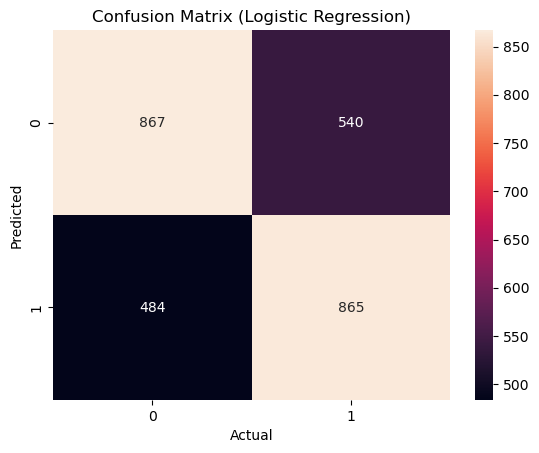

In [183]:
#Confusion Matrix Vanilla Random Forest
from sklearn.metrics import confusion_matrix
lrc = confusion_matrix(y_test,lr_pred)
sns.heatmap(lrc, annot=True, fmt='g').set(title='Confusion Matrix (Logistic Regression)', xlabel='Actual', ylabel='Predicted')

Naive Bayes

In [184]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

c:\Users\sumed\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [185]:
nb_pred = nb.predict(X_test)
print(nb_pred)

[1 1 1 ... 1 1 1]


In [186]:
print(f'Train Accuracy:- {nb.score(X_train,y_train):.3f}')
print(f'Test Accuracy:- {nb.score(X_test,y_test):.3f}')

Train Accuracy:- 0.637
Test Accuracy:- 0.635


[Text(0.5, 1.0, 'Confusion Matrix (Naive Bayes)'),
 Text(0.5, 23.52222222222222, 'Actual'),
 Text(50.722222222222214, 0.5, 'Predicted')]

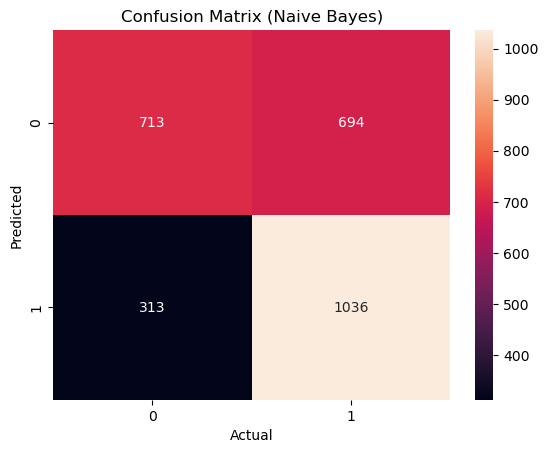

In [187]:
#Confusion Matrix Naive Bayes
from sklearn.metrics import confusion_matrix
nc = confusion_matrix(y_test,nb_pred)
sns.heatmap(nc, annot=True, fmt='g').set(title='Confusion Matrix (Naive Bayes)', xlabel='Actual', ylabel='Predicted')

 MaxVote Ensemble

In [188]:
from sklearn.ensemble import VotingClassifier

model = VotingClassifier(estimators=[('rf', rf), ('nb', nb), ('lr', lr)], voting='hard')
model.fit(X_train,y_train)
model.score(X_test,y_test)

c:\Users\sumed\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\sumed\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\sumed\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

0.7391146589259797

Averaging Ensemble

In [189]:
pred1 = rf.predict_proba(X_test)
pred2 = nb.predict_proba(X_test)
pred3 = lr.predict_proba(X_test)

finalpred = (pred1+pred2+pred3)/3
print(finalpred)

[[0.55974518 0.44025482]
 [0.12229545 0.87770455]
 [0.03000091 0.96999909]
 ...
 [0.61666667 0.38333333]
 [0.55620569 0.44379431]
 [0.13315904 0.86684096]]


In [190]:
print(finalpred[:,0])
finalpred = finalpred[:,0]

[0.55974518 0.12229545 0.03000091 ... 0.61666667 0.55620569 0.13315904]


In [191]:
for i in range (0,len(finalpred)):
    if(finalpred[i]>=0.5):
        finalpred[i] = 0
    else:
        finalpred[i] = 1
        
finalpred = finalpred.astype("int32")
print(finalpred)        

[0 1 1 ... 0 0 1]


In [192]:
s = y_test
count = 0
for i in range(len(finalpred)):
  if finalpred[i]==s[i]:
    count = count+1
print(count)
len(finalpred)
accuracy = count/len(finalpred)
accuracy

2000


0.7256894049346879

In [193]:
import pandas as pd
index = ['Random Forest','Naive Bayes','Logistic Regression','Ensemble']
data = [[rf.score(X_train,y_train) , rf.score(X_test,y_test)],[nb.score(X_train,y_train) , nb.score(X_test,y_test)], [lr.score(X_train,y_train) , lr.score(X_test,y_test)],[model.score(X_train,y_train) , model.score(X_test,y_test)]]
accuracy_table = pd.DataFrame(data, columns = ['Train Accuracy' , 'Test Accuracy'], index = index)
accuracy_table

,Train Accuracy,Test Accuracy
Random Forest,1.000000,0.828374
Naive Bayes,0.636803,0.634615
Logistic Regression,0.956012,0.628447
Ensemble,0.975042,0.739115


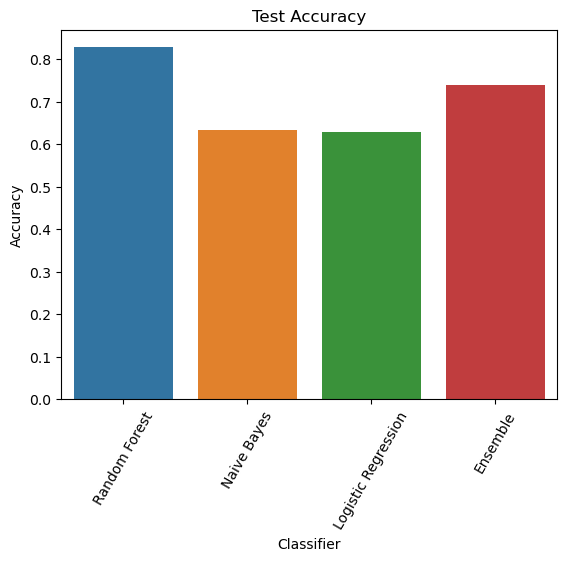

In [194]:
axis = sns.barplot(x = index, y = accuracy_table['Test Accuracy'])
plt.title('Test Accuracy')
axis.set(xlabel='Classifier', ylabel='Accuracy')
for item in axis.get_xticklabels():
    item.set_rotation(60)

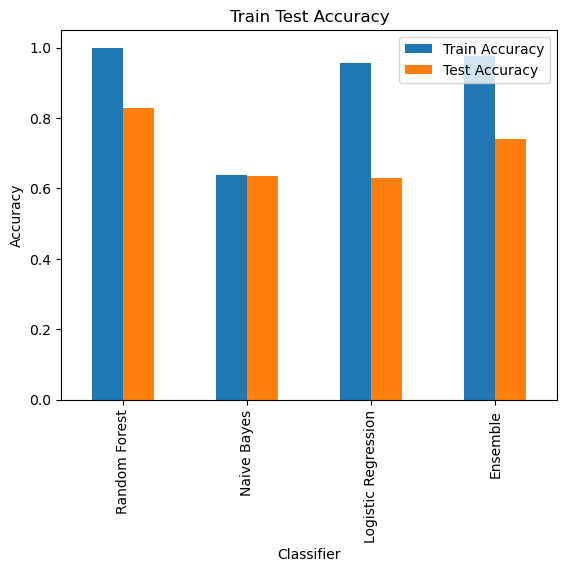

In [195]:
accuracy_table.plot.bar() 
plt.title('Train Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.show()